In [33]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [34]:
## considered 2 inputs = x ; y is a quadratic equation

X= 6 * np.random.rand(100,1)-3
y= 0.5 * X**2 + 1.5*X +2 + np.random.rand(100,1)

Text(0, 0.5, 'y dataset')

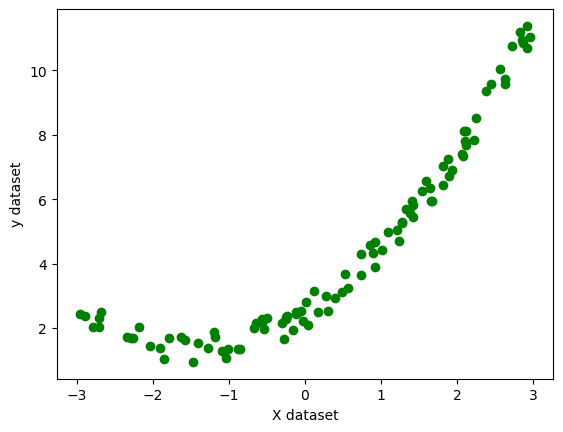

In [35]:
## plot X and y
plt.scatter(X,y,color='green')
plt.xlabel('X dataset')
plt.ylabel('y dataset')

## lets implement from Simple Linear regression and then by PLR and compare both


In [36]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
## implement SLR
from sklearn.linear_model import LinearRegression
regression1=LinearRegression()

In [38]:
regression1.fit(X_train,y_train)

LinearRegression()

In [39]:
print(regression1.coef_)

[[1.62774058]]


In [40]:
y_pred=regression1.predict(X_test)

In [41]:
print(y_pred)

[[ 5.30970901]
 [ 2.99485798]
 [ 6.51285663]
 [ 5.11532041]
 [ 4.41117302]
 [ 0.61457842]
 [ 5.42410949]
 [ 4.56466933]
 [ 6.87245164]
 [ 7.3707069 ]
 [ 6.58560766]
 [ 7.91016523]
 [ 7.37234518]
 [-0.47773921]
 [ 6.97658055]
 [ 7.05821855]
 [ 5.37109021]
 [ 4.84859562]
 [ 8.52523936]
 [ 3.54659683]]


In [42]:
## R square and adjusted r sq

from sklearn.metrics import r2_score
r2score=r2_score(y_test,y_pred)
adjustedRsq=1-(1-r2score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r2score)
print(adjustedRsq)

## you can see r square is very very high - because SImple LR - is not rigth method

0.7456595466368809
0.731529521450041


In [43]:
## Performance metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

1.8150631695895096
1.103065764665585
1.34724280276033


Text(0, 0.5, 'Y')

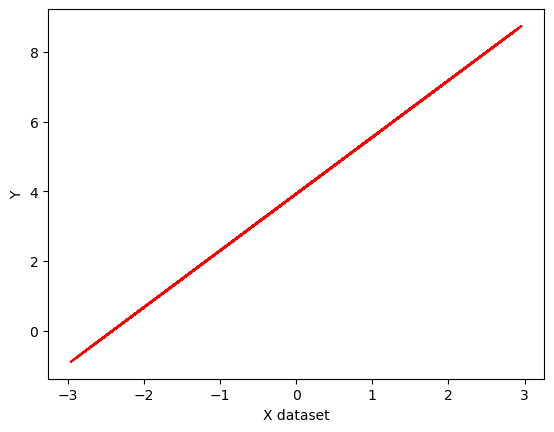

In [54]:
## visualise with SLR
plt.plot(X_train,regression1.predict(X_train),color='r')
##plt.scatter(X_test,y_train)
plt.xlabel('X dataset')
plt.ylabel('Y')

In [ ]:
## equation we are using above is 0 degree  with 1 input ; so we will now increase the degree to make a generalised model

In [55]:
## applying polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)

In [56]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [57]:
X_train_poly

array([[ 1.00000000e+00, -1.08489766e+00,  1.17700293e+00],
       [ 1.00000000e+00, -5.71152520e-01,  3.26215201e-01],
       [ 1.00000000e+00, -6.43130361e-01,  4.13616661e-01],
       [ 1.00000000e+00,  1.88991607e+00,  3.57178275e+00],
       [ 1.00000000e+00, -1.52370318e-01,  2.32167137e-02],
       [ 1.00000000e+00,  1.64869962e+00,  2.71821043e+00],
       [ 1.00000000e+00, -1.85466353e+00,  3.43977680e+00],
       [ 1.00000000e+00, -1.46576802e+00,  2.14847589e+00],
       [ 1.00000000e+00, -1.19339741e+00,  1.42419738e+00],
       [ 1.00000000e+00, -1.40108585e+00,  1.96304157e+00],
       [ 1.00000000e+00, -1.17892476e+00,  1.38986359e+00],
       [ 1.00000000e+00,  1.13364672e-01,  1.28515488e-02],
       [ 1.00000000e+00,  1.40114314e+00,  1.96320210e+00],
       [ 1.00000000e+00, -1.90475457e+00,  3.62808996e+00],
       [ 1.00000000e+00,  2.07476775e+00,  4.30466121e+00],
       [ 1.00000000e+00, -2.96046510e+00,  8.76435362e+00],
       [ 1.00000000e+00, -1.78367642e+00

In [58]:
X_test_poly

array([[ 1.        ,  0.85159029,  0.72520602],
       [ 1.        , -0.57053499,  0.32551018],
       [ 1.        ,  1.59074223,  2.53046085],
       [ 1.        ,  0.73216794,  0.53606989],
       [ 1.        ,  0.29957604,  0.0897458 ],
       [ 1.        , -2.03285619,  4.13250431],
       [ 1.        ,  0.92187205,  0.84984808],
       [ 1.        ,  0.39387627,  0.15513852],
       [ 1.        ,  1.81165889,  3.28210795],
       [ 1.        ,  2.11776127,  4.4849128 ],
       [ 1.        ,  1.63543672,  2.67465326],
       [ 1.        ,  2.44917669,  5.99846645],
       [ 1.        ,  2.11876775,  4.48917677],
       [ 1.        , -2.7039199 ,  7.31118285],
       [ 1.        ,  1.87563034,  3.51798916],
       [ 1.        ,  1.92578452,  3.70864601],
       [ 1.        ,  0.88929973,  0.79085402],
       [ 1.        ,  0.56830596,  0.32297167],
       [ 1.        ,  2.82704656,  7.99219228],
       [ 1.        , -0.23157505,  0.053627  ]])

In [68]:
## now apply LR
from sklearn.linear_model import LinearRegression
regression2=LinearRegression()
regression2.fit(X_train_poly,y_train)
y_pred=regression2.predict(X_test_poly)

In [69]:
y_pred

array([[ 4.16904307],
       [ 1.85663238],
       [ 6.16118449],
       [ 3.89790065],
       [ 3.03385131],
       [ 1.56542877],
       [ 4.33520975],
       [ 3.20642359],
       [ 6.8615127 ],
       [ 7.9116914 ],
       [ 6.29897434],
       [ 9.15323253],
       [ 7.91529734],
       [ 2.14000113],
       [ 7.07332411],
       [ 7.24221765],
       [ 4.25759164],
       [ 3.54882324],
       [10.70138405],
       [ 2.22616689]])

In [70]:
## R square and adjusted r sq

from sklearn.metrics import r2_score
r2score_poly=r2_score(y_test,y_pred)

print(r2score_poly)


0.9858638788231167


In [71]:
print(regression2.coef_)

## 3 coeffients - beacuse 3 slope with degree 2 polynomial

[[0.         1.48699132 0.49468301]]


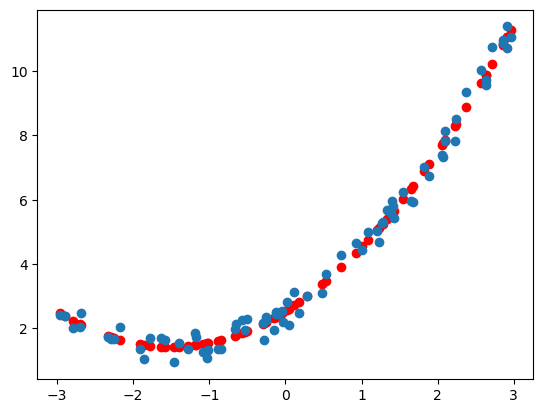

In [75]:
## plot
plt.scatter(X_train,regression2.predict(X_train_poly),color='r')
plt.scatter(X_train,y_train)

## compare both- degree 2 curve still does have some error ( yet not best fit curve)

In [76]:
### lets see if degree value 3 - will accuracy increase?

from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [77]:
X_train_poly

## 4 values - beacuse 4 beta's

array([[ 1.00000000e+00, -1.08489766e+00,  1.17700293e+00,
        -1.27692773e+00],
       [ 1.00000000e+00, -5.71152520e-01,  3.26215201e-01,
        -1.86318634e-01],
       [ 1.00000000e+00, -6.43130361e-01,  4.13616661e-01,
        -2.66009433e-01],
       [ 1.00000000e+00,  1.88991607e+00,  3.57178275e+00,
         6.75036963e+00],
       [ 1.00000000e+00, -1.52370318e-01,  2.32167137e-02,
        -3.53753805e-03],
       [ 1.00000000e+00,  1.64869962e+00,  2.71821043e+00,
         4.48151249e+00],
       [ 1.00000000e+00, -1.85466353e+00,  3.43977680e+00,
        -6.37962858e+00],
       [ 1.00000000e+00, -1.46576802e+00,  2.14847589e+00,
        -3.14916726e+00],
       [ 1.00000000e+00, -1.19339741e+00,  1.42419738e+00,
        -1.69963347e+00],
       [ 1.00000000e+00, -1.40108585e+00,  1.96304157e+00,
        -2.75038977e+00],
       [ 1.00000000e+00, -1.17892476e+00,  1.38986359e+00,
        -1.63854459e+00],
       [ 1.00000000e+00,  1.13364672e-01,  1.28515488e-02,
      

In [78]:
## accuracy by r sq value
## now apply LR
from sklearn.linear_model import LinearRegression
regression3=LinearRegression()
regression3.fit(X_train_poly,y_train)
y_pred=regression3.predict(X_test_poly)

from sklearn.metrics import r2_score
r2score_polydegree3=r2_score(y_test,y_pred)

print(r2score_polydegree3)



0.9859721797551418


In [ ]:
## we see hardly any difference from r square in degree 2 PLR

In [79]:
print(regression3.coef_)

[[0.00000000e+00 1.47989427e+00 4.94495724e-01 1.29250733e-03]]


In [118]:
##### prediction of new data ; lets consider new data for degree 3 , once transform applied - it will have 4 beta values

X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

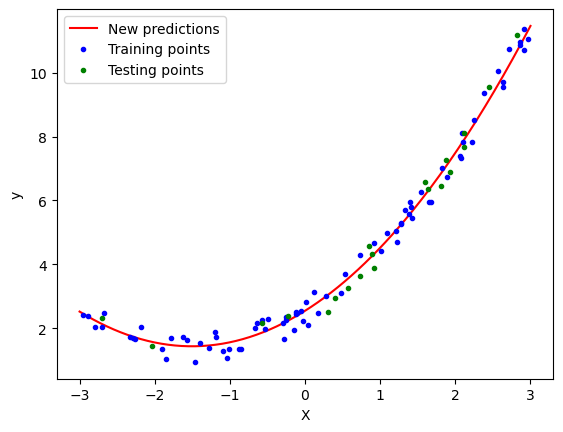

In [123]:
### apply regression model to evaluate y_pred_new=y_new on input data= generalised polynomial =X_new_poly
## using regression3 model which was polynomial
y_new=regression3.predict(X_new_poly)
plt.plot(X_new,y_new,"r-",label="New predictions")
plt.plot(X_train,y_train,"b.",label="Training points")
plt.plot(X_test,y_test,"g.",label="Testing points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

#### Pipeline Concepts - used for making generalised function for polynomial linear regression

In [125]:
from sklearn.pipeline import Pipeline

In [139]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200,1)
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train)
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new,y_pred_new,'r',label="Degree" +str(degree), linewidth=3)
    plt.plot(X_train,y_train,"b.",linewidth=3)
    plt.plot(X_test,y_test,"g.",linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4,0,10])
    plt.show()

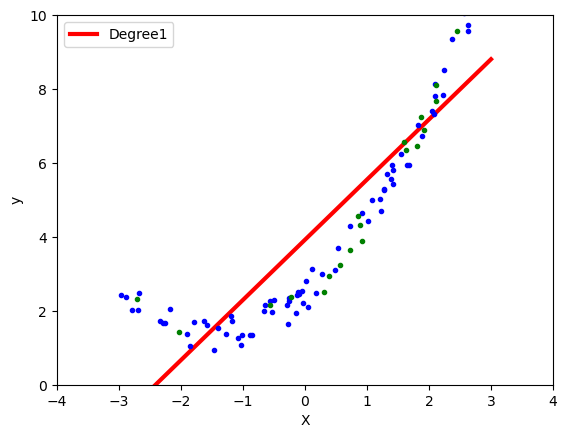

In [142]:
poly_regression(1)

## not close to all points

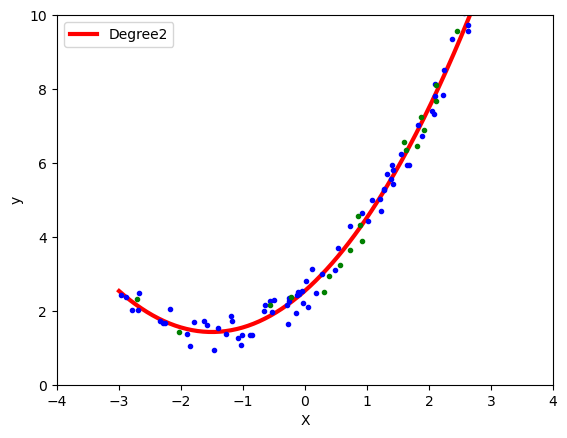

In [143]:
poly_regression(2)

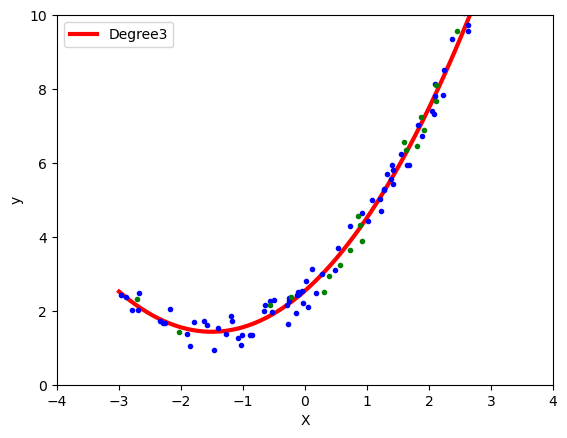

In [144]:
poly_regression(3)

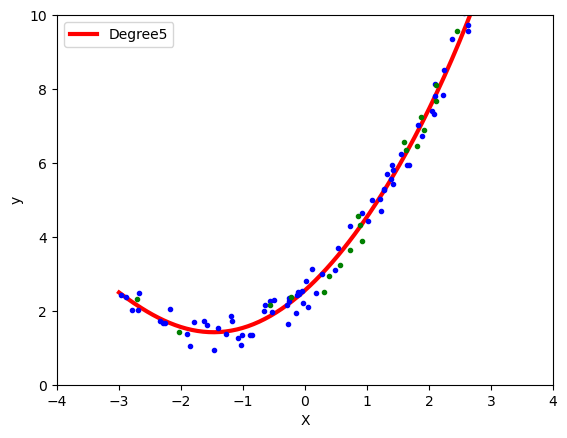

In [145]:
poly_regression(5)

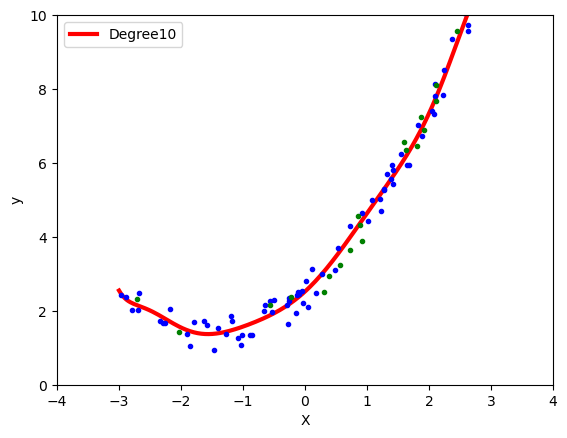

In [147]:
poly_regression(10)

## over fitting increasing with degree increased